In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random

In [ ]:
# userAgents = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36']
# urls = []
# for page in range(1, 501):
#   url = 'https://uae.yallamotor.com/used-cars/search?page=' + str(page)
#   response = requests.get(url, headers={'User-Agent': random.choice(userAgents)})
#   soup = BeautifulSoup(response.text, "html.parser")
#   for i in soup.find_all('div', class_='p0 position-rel uc-img'):
#     urls.append('https://uae.yallamotor.com/' + i.find('a')['href'])

In [ ]:
# cars_list = []

# n = 1

# for url in urls:
#   print(n, end=' ')
#   n+=1

#   info_dict = {}
#   response = requests.get(url, headers={'User-Agent': random.choice(userAgents)})
#   soup = BeautifulSoup(response.text, "html.parser")
#   try:

#     info_list = ([i.text.strip() for i in soup.find_all(class_="col is-5 p0 font-b")])
#     keys = ['year', 'location', 'mileage', 'engine_capacity', 'transmission', 'service_history', 'drive_type', 'regional_specs', 'owners',
#             'fuel_type', 'cylinders', 'doors', 'seats', 'condition', 'modifications']
#     for key, value in zip(keys, info_list):
#         info_dict[key] = value

#     info_dict['name'] = soup.find('h1', class_='font24').text
#     info_dict['aed_price'] = soup.find('span', class_='font28 font-b').text
#     info_dict['colour'] = [i.text.strip() for i in soup.find_all(class_="font14 text-center font-b m2t")][5]

#     cars_list.append(info_dict)

#   except Exception:
#     pass

In [ ]:
# df = pd.DataFrame(cars_list)

In [ ]:
# df.to_csv('yallamotors_10k.csv', index = False, encoding='utf-8')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/yallamotors_10k.csv')

In [ ]:
df.shape

(9483, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             9483 non-null   int64  
 1   location         9483 non-null   object 
 2   mileage          9483 non-null   object 
 3   engine_capacity  6275 non-null   float64
 4   transmission     9429 non-null   object 
 5   service_history  1362 non-null   object 
 6   drive_type       9483 non-null   object 
 7   regional_specs   9483 non-null   object 
 8   owners           1382 non-null   float64
 9   fuel_type        8794 non-null   object 
 10  cylinders        9082 non-null   object 
 11  doors            8523 non-null   object 
 12  seats            7094 non-null   object 
 13  condition        6784 non-null   object 
 14  modifications    540 non-null    object 
 15  name             9483 non-null   object 
 16  aed_price        9483 non-null   object 
 17  colour        

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(7482, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 9482
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             7482 non-null   int64  
 1   location         7482 non-null   object 
 2   mileage          7482 non-null   object 
 3   engine_capacity  4953 non-null   float64
 4   transmission     7438 non-null   object 
 5   service_history  1182 non-null   object 
 6   drive_type       7482 non-null   object 
 7   regional_specs   7482 non-null   object 
 8   owners           1243 non-null   float64
 9   fuel_type        6838 non-null   object 
 10  cylinders        7196 non-null   object 
 11  doors            6658 non-null   object 
 12  seats            5493 non-null   object 
 13  condition        5391 non-null   object 
 14  modifications    426 non-null    object 
 15  name             7482 non-null   object 
 16  aed_price        7482 non-null   object 
 17  colour        

In [ ]:
threshold = len(df) * 0.3
df.dropna(axis=1, thresh=threshold, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 9482
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             7482 non-null   int64  
 1   location         7482 non-null   object 
 2   mileage          7482 non-null   object 
 3   engine_capacity  4953 non-null   float64
 4   transmission     7438 non-null   object 
 5   drive_type       7482 non-null   object 
 6   regional_specs   7482 non-null   object 
 7   fuel_type        6838 non-null   object 
 8   cylinders        7196 non-null   object 
 9   doors            6658 non-null   object 
 10  seats            5493 non-null   object 
 11  condition        5391 non-null   object 
 12  name             7482 non-null   object 
 13  aed_price        7482 non-null   object 
 14  colour           7079 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 935.2+ KB


In [ ]:
#########################################################################################################################################

In [ ]:
df = df[df['year'] < 2024]

In [ ]:
df['year'].max()

2023

In [ ]:
# df['age'] = 2024 - df['year']
# df.drop(['year'], axis = 1, inplace = True)

In [ ]:
df.location.unique()

array(['Souq Al Haraj', 'Ras Al Khor', 'Al Awir', 'Al Jarf',
       'Al Reem Island', 'Al Khalidiyah', 'Ras Al Khaimah', 'Sharjah',
       'Dubai', 'Mohammed Bin Zayed City', 'Other', 'Tecom', 'Muhaisanah',
       'Al Hamidiya', 'Al Jimi', 'Al Azrra', 'Al Darrare', 'Al Quoz',
       'Al Mamzar', 'Mankhool', 'Al Humaid City', 'Al Majaz',
       'Hamdan Street', 'Al Dana', 'Nadd Al Shiba', 'Discovery Gardens',
       'Al Mutarad', 'Ajman', 'The Gardens', 'Al Nahda',
       'Dubai Silicon Oasis', 'Al Bustan', 'Al Rahmaniah',
       'International City Phase3', 'Al Ain', 'International City',
       'The Springs', 'Oud Al Muteena', 'Bur Dubai', 'Arabian Ranches',
       'Al Garhoud', 'Al Khan', 'Al Ghafiya', 'Dubai Festival City',
       'Al Qusais', 'Tourist Club Area', 'Abu Dhabi',
       'Mussafah Industrial Area', 'Al Khawaneej', 'Al Muraqqabat',
       'Mussafah Residential &amp; Commercial Area', 'Al Karamah',
       'Abu Dhabi Industrial City', 'Al Fallaj', 'Abu Shagara',
       'Al

Location

In [ ]:
location_list = ['Dubai', 'Ras Al Khor', 'Sharjah', 'Souq Al Haraj', 'Al Awir', 'Al Quoz', 'Abu Dhabi', 'Al Jarf', 'Ajman', 'Al Qusais']
df['location'] = df['location'].apply(lambda x: x if x in location_list else 'other_city')

Mileage(KM)

In [ ]:
df['mileage'] = df['mileage'].str.replace(',', '').astype(float)
mileage_dict = df.groupby('year').agg({'mileage': 'mean'}).sort_values('year', ascending=False)['mileage'].to_dict()
df['mileage'] = df.year.map(mileage_dict)

Extracting electric engines

In [ ]:
def extract_electric_engines(row):
    if row['fuel_type'] == 'Electric':
        return row['engine_capacity']
    else:
        return None

df['electric_engine_capacity'] = df.apply(extract_electric_engines, axis=1)
df['electric_engine_capacity'] =  df['electric_engine_capacity'] / 100

In [ ]:
def extract_non_electric_engines(row):
    if row['fuel_type'] != 'Electric':
        return row['engine_capacity']
    else:
        return None

df['fuel_engine_capacity'] = df.apply(extract_non_electric_engines, axis=1)


df['fuel_engine_capacity'] = df['fuel_engine_capacity'].astype(str)
def clean_engine(capacity):
    try:
        if capacity == "nan" or capacity == "-1.0":
            return np.nan
        value = float(capacity)
        if capacity == "15.0":
            return 1.5
        if len(capacity) == 3 or len(capacity) == 4:
            return value
        if len(capacity) == 7:
            return round(value / 10000, 1)
        return round(value / 1000, 1)
    except ValueError:
        return np.nan

df['fuel_engine_capacity'] = df['fuel_engine_capacity'].map(clean_engine)

df.drop('engine_capacity', axis = 1, inplace = True)


Transmission

In [ ]:
df['transmission'] = df['transmission'].replace('translation missing: en.car_version.feature.transmission.tiptronic', np.nan)

mode = df['transmission'].mode()[0]

df['transmission'].fillna(mode, inplace=True)

Extracting features 'brand' and 'model' from name

In [ ]:
df['brand'] = df['name'].str.split(' ').str.get(1)
df['model'] = df['name'].str.split(' ').str.get(2)
df.drop('name', axis = 1, inplace = True)

Regional specifications

In [ ]:
df['regional_specs'] = df['regional_specs'].apply(lambda x: 0 if x == 'Not Sure' else 1)

Fuel type

In [ ]:
mode = df['fuel_type'].mode()[0]
df['fuel_type'].fillna(mode, inplace=True)

Filling nan values by model's fuel



In [ ]:
def fill_fuel_type(df):
    fill_dict = {}

    for index, row in df.iterrows():
        model = row['model']
        fuel_type = row['fuel_type']

        if not pd.isna(fuel_type):
            fill_dict[model] = fuel_type

    for index, row in df.iterrows():
        model = row['model']
        fuel_type = row['fuel_type']

        if pd.isna(fuel_type):
            if model in fill_dict:
                df.at[index, 'fuel_type'] = fill_dict[model]

fill_fuel_type(df)

mode = df['fuel_type'].mode()[0]
df['fuel_type'].fillna(mode, inplace=True)

Colour

In [ ]:
colour_list = ['White', 'Black', 'Gray', 'Silver', 'Blue', 'Red', 'Grey ', 'Brown', 'Gold']
df['colour'] = df['colour'].apply(lambda x: x if x in colour_list else 'other_colour')

Cylinders

In [ ]:
values = ['N/A, Electric', 'Not Sure', 'Other', 'translation missing: en.cylinder.62kwh', 'translation missing: en.cylinder.100kwh']
df['cylinders'] = df['cylinders'].replace(values, np.nan).astype(float)
mean = df['cylinders'].mean()
df['cylinders'].fillna(mean, inplace=True)


AED and USD price

In [ ]:
df['aed_price'] = df['aed_price'].str.replace(',', '').replace('Call for Price', np.nan).astype(float)
df.dropna(subset=['aed_price'], inplace=True)

exchange_rate = 0.27
df['usd_price'] = df['aed_price'] * exchange_rate
df.drop('aed_price', axis = 1, inplace = True)

Seats

In [ ]:
def clean_seats(seat):
    if pd.isna(seat):
        return np.nan
    try:
        return float(seat.split()[0])
    except (ValueError, TypeError):
        return np.nan

df['seats'] = df['seats'].map(clean_seats)

median = df['seats'].median()

df['seats'].fillna(median, inplace=True)

Doors

In [ ]:
df['doors'] = df['doors'].replace('translation missing: en.used_cars.features.6', np.nan).astype(float)

median = df['doors'].median()

df['doors'].fillna(median, inplace=True)

Filling nan values by model's condition


In [ ]:
def fill_condition(df):
    fill_dict = {}

    for index, row in df.iterrows():
        model = row['model']
        fuel_type = row['condition']

        if not pd.isna(fuel_type):
            fill_dict[model] = fuel_type

    for index, row in df.iterrows():
        model = row['model']
        fuel_type = row['condition']

        if pd.isna(fuel_type):
            if model in fill_dict:
                df.at[index, 'condition'] = fill_dict[model]

fill_condition(df)

mode = df['condition'].mode()[0]
df['condition'].fillna(mode, inplace=True)

Filling engine_capacity with zeros

In [ ]:
columns_to_fill = ['electric_engine_capacity', 'fuel_engine_capacity']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

Drive Type

In [ ]:
drive_list = ['All-Wheel Drive (AWD)', 'Drive']
df['drive_type'] = df['drive_type'].replace(drive_list, 'All Wheel Drive')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 0 to 9482
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7084 non-null   int64  
 1   location                  7084 non-null   object 
 2   mileage                   7084 non-null   float64
 3   transmission              7084 non-null   object 
 4   drive_type                7084 non-null   object 
 5   regional_specs            7084 non-null   int64  
 6   fuel_type                 7084 non-null   object 
 7   cylinders                 7084 non-null   float64
 8   doors                     7084 non-null   float64
 9   seats                     7084 non-null   float64
 10  condition                 7084 non-null   object 
 11  colour                    7084 non-null   object 
 12  electric_engine_capacity  7084 non-null   float64
 13  fuel_engine_capacity      7084 non-null   float64
 14  brand   

EDA

<Axes: xlabel='usd_price', ylabel='Density'>

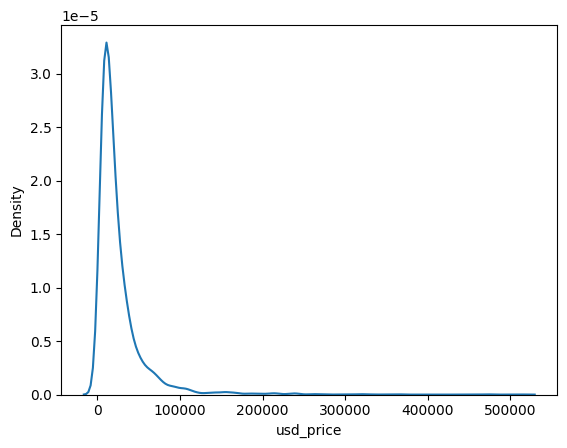

In [ ]:
sns.kdeplot(df.usd_price)


There are some outliers

In [ ]:
df = df[df['usd_price'] < 400000]


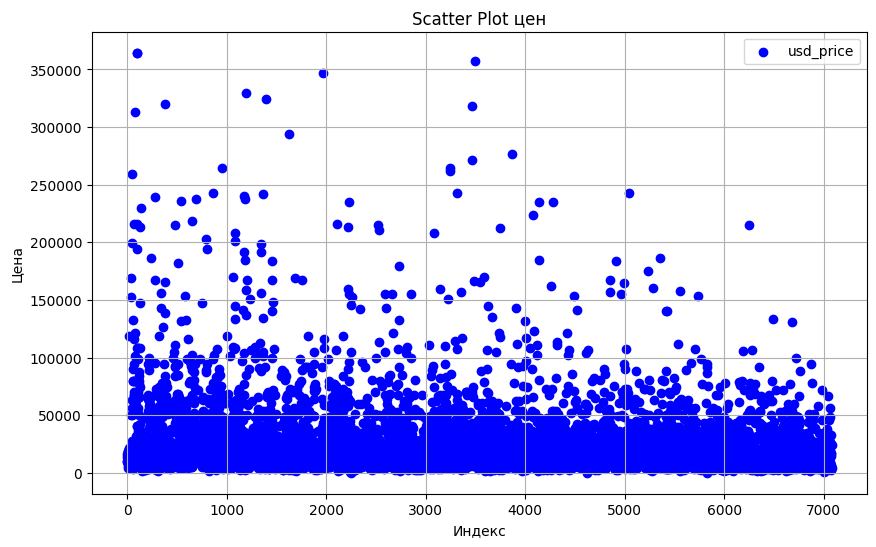

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['usd_price'])), df['usd_price'], marker='o', c='b', label='usd_price')
plt.title('Price Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='usd_price', ylabel='Density'>

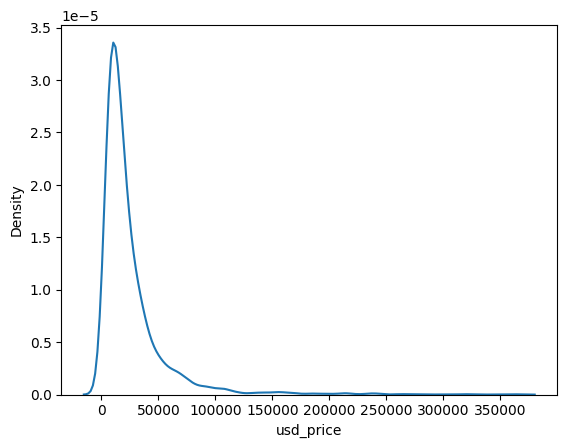

In [ ]:
sns.kdeplot(df.usd_price)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.scatter(df, x='mileage', y='year', symbol = 'model', color = 'model')
fig.show()

In [ ]:
fig = px.scatter(df, x='mileage', y='usd_price', symbol = 'model', color = 'model')
fig.show()

In [ ]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Price in Dollars", "Mileage", "Fuel Engine",
                                                   "Year", "Cylinders", "Doors"))

fig.add_trace(
    go.Histogram(x=df['usd_price'], name="USD"),
    row=1, col=1
)

fig.add_trace(
   go.Histogram(x=df['mileage'], name="KM"),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['fuel_engine_capacity'], name="L"),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=df['year'], name="Years"),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=df['cylinders'], name="Cylinders"),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x=df['doors'], name="Doors"),
    row=3, col=2
)



fig.update_layout(height=1600, width=1000, title_text="Distribution of numerical data")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Price in Dollars", "Mileage", "Fuel Engine",
                                                   "Year", "Cylinders", "Doors"))

fig.add_trace(
    go.Box(x=df['usd_price'], name="USD"),
    row=1, col=1
)

fig.add_trace(
   go.Box(x=df['mileage'], name="KM"),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=df['fuel_engine_capacity'], name="L"),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df['year'], name="Years"),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df['cylinders'], name="Cylinders"),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df['doors'], name="Number of Doors"),
    row=3, col=2
)



fig.update_layout(height=1600, width=1000, title_text="Distribution of numerical data")
fig.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7080 entries, 0 to 9482
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7080 non-null   int64  
 1   location                  7080 non-null   object 
 2   mileage                   7080 non-null   float64
 3   transmission              7080 non-null   object 
 4   drive_type                7080 non-null   object 
 5   regional_specs            7080 non-null   int64  
 6   fuel_type                 7080 non-null   object 
 7   cylinders                 7080 non-null   float64
 8   doors                     7080 non-null   float64
 9   seats                     7080 non-null   float64
 10  condition                 7080 non-null   object 
 11  colour                    7080 non-null   object 
 12  electric_engine_capacity  7080 non-null   float64
 13  fuel_engine_capacity      7080 non-null   float64
 14  brand   

In [ ]:
count_fuel = df['fuel_type'].value_counts().reset_index()
count_fuel = count_fuel.rename(columns = {'index':'fuel_type','fuel_type':'count'})

count_condition = df['condition'].value_counts().reset_index()
count_condition = count_condition.rename(columns = {'index':'condition','condition':'count'})

count_transmission = df['transmission'].value_counts().reset_index()
count_transmission = count_transmission.rename(columns = {'index':'transmission','transmission':'count'})

count_colour = df['colour'].value_counts().reset_index()
count_colour = count_colour.rename(columns = {'index':'colour','colour':'count'})

count_brand = df['brand'].value_counts().reset_index()
count_brand = count_brand.rename(columns = {'index':'brand','brand':'count'})

count_fuel_type = df['fuel_type'].value_counts().reset_index()
count_fuel_type = count_fuel_type.rename(columns = {'index':'fuel_type','fuel_type':'count'})

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Fuel Type", "Condition of Car", "Transmission Type",
                                                   "Colour of Car", "Brand"))

fig.add_trace(
    go.Bar(y=count_fuel['count'], x=count_fuel['fuel_type'], name="Fuel type"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=count_condition['count'], x=count_condition['condition'], name="Condition of Car"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y=count_transmission['count'], x=count_transmission['transmission'], name="Transmission"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y=count_colour['count'], x=count_colour['colour'], name="Colour of Car"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(y=count_brand['count'], x=count_brand['brand'], name="Brand"),
    row=3, col=1
)

fig.add_trace(
    go.Bar(y=count_fuel_type['count'], x=count_fuel_type['fuel_type'], name="fuel_type"),
    row=3, col=2
)

fig.update_layout(height=1600, width=1000, title_text="Distribution of categorical data")
fig.show()


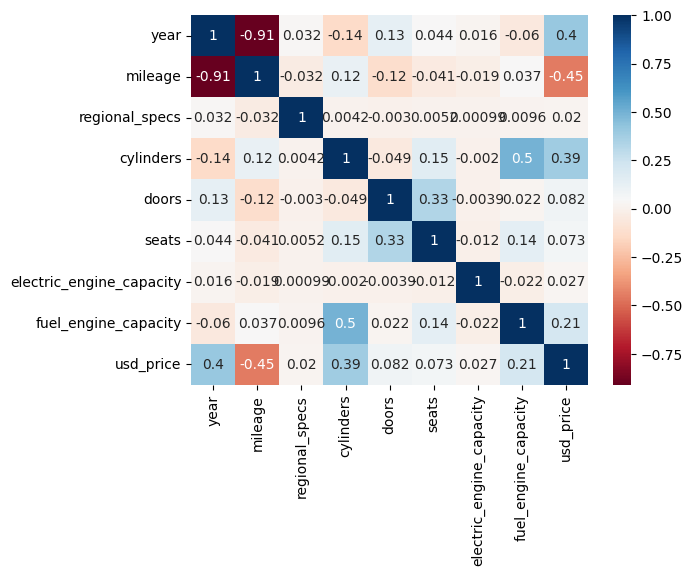

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
df.describe()

,year,mileage,regional_specs,cylinders,doors,seats,electric_engine_capacity,fuel_engine_capacity,usd_price
count,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000
mean,2017.154237,106018.329354,0.997599,5.073431,4.133192,5.184181,0.022597,1.851879,25459.930831
std,4.511159,69528.384970,0.048946,1.431948,0.699060,1.185436,1.114696,1.684574,30736.868524
min,1951.000000,337.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,189.000000
25%,2015.000000,64391.607232,1.000000,4.000000,4.000000,5.000000,0.000000,0.000000,9423.000000
50%,2018.000000,99711.361564,1.000000,4.000000,4.000000,5.000000,0.000000,2.000000,16200.000000
75%,2020.000000,150207.072041,1.000000,6.000000,5.000000,5.000000,0.000000,3.000000,29700.000000
max,2023.000000,865390.750000,1.000000,12.000000,5.000000,30.000000,80.000000,8.000000,364500.000000


FEATURE ENGINEERING

In [ ]:
df_fe = df.copy()

I decided to remove 'hybrid and electric' fuel_type because 'mileage' feature is measured in KM.

In [ ]:
df_fe = df_fe[~df_fe['fuel_type'].isin(['Hybrid','Electric'])]
df_fe.drop(['electric_engine_capacity'], axis=1, inplace=True)

Removing 'year' featura and obtaining new feature 'age'

In [ ]:
df_fe['age'] = 2024 - df_fe['year']
df_fe.drop(['year'], axis = 1, inplace = True)
df_fe['age'] = np.log(df_fe['age'])


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6939 entries, 0 to 9482
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6939 non-null   object 
 1   mileage               6939 non-null   float64
 2   transmission          6939 non-null   object 
 3   drive_type            6939 non-null   object 
 4   regional_specs        6939 non-null   int64  
 5   fuel_type             6939 non-null   object 
 6   cylinders             6939 non-null   float64
 7   doors                 6939 non-null   float64
 8   seats                 6939 non-null   float64
 9   condition             6939 non-null   object 
 10  colour                6939 non-null   object 
 11  fuel_engine_capacity  6939 non-null   float64
 12  brand                 6939 non-null   object 
 13  model                 6939 non-null   object 
 14  usd_price             6939 non-null   float64
 15  age                  

In [ ]:
df_fe['usd_price'] = np.log(df_fe['usd_price'])


Removed some outliers in 'mileage' feature

In [ ]:
df_fe = df_fe[df_fe['mileage'] < 400000]


Converted 'seats' feature into string datatype, since they are categorical data

In [ ]:
df_fe['seats'] = df_fe['seats'].astype(str)

In [ ]:
df_fe.describe()

,mileage,regional_specs,cylinders,doors,fuel_engine_capacity,usd_price,age
count,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000
mean,106384.392744,0.997691,5.080753,4.127435,1.860124,9.727175,1.691249
std,66551.131836,0.048001,1.439859,0.698736,1.689174,0.864404,0.757742
min,337.000000,0.000000,3.000000,2.000000,0.000000,5.241747,0.000000
25%,64391.607232,1.000000,4.000000,4.000000,0.000000,9.139381,1.386294
50%,99711.361564,1.000000,4.000000,4.000000,2.000000,9.689411,1.791759
75%,150207.072041,1.000000,6.000000,5.000000,3.000000,10.289770,2.197225
max,306555.333333,1.000000,12.000000,5.000000,8.000000,12.806282,4.290459


Using one-hot encoding to represent the categorical data for regression


In [ ]:
df_fe = pd.get_dummies(data = df_fe, drop_first=True)
df_fe.head()

,mileage,regional_specs,cylinders,doors,fuel_engine_capacity,usd_price,age,location_Ajman,location_Al Awir,location_Al Jarf,...,model_Xpander,model_Xterra,model_Yaris,model_Yukon,model_Z4,model_ZS,model_e-tron,model_i10,model_i7,model_tC
0,79624.907478,1,4.0,4.0,1.5,9.508443,1.609438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,209267.872549,1,6.0,4.0,3.5,9.150909,2.708050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79624.907478,1,4.0,5.0,2.0,9.284798,1.609438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79624.907478,1,6.0,5.0,3.0,9.709296,1.609438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,186871.298643,1,6.0,4.0,3.0,9.336092,2.484907,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Assigning the feature variables and the target variable

In [ ]:
X = df_fe.drop(['usd_price'], axis=1)
y = df_fe['usd_price']

 Splitting the dataset into training set(for modelling) and test set(for evaluation)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (5543, 627)
x test:  (1386, 627)
y train:  (5543,)
y test:  (1386,)


Scaling the numerical data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var = ['mileage', 'cylinders', 'fuel_engine_capacity', 'age']
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

Using automatic feature selection using Recursive Feature Elimination(RFE) to check if it works better.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
                 n_features_to_select=40)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)

Main function to fit all regression model, check r2_score,check cross-validation score, plot residual plot and plot scatterplot of y_test_prediction vs y_test

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores = []
r2_test_scores = []
cv_mean = []

def car_price_prediction_model(model):
    model.fit(X_train, y_train)

    #R2 score of training set
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))

    #R2 score of test set
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))

    # CV score of training set
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))



    # Printing each score
    print("Training set R2 scores: ",round(r2_train,2))
    print("Test set R2 scores: ",round(r2_test,2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))


    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Main function to fit all regression model based on the RFE-dataset, check r2_score,check cross-validation score, plot residual plot and plot scatterplot of y_test_prediction_rfe vs y_test

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores_rfe = []
r2_test_scores_rfe = []
cv_mean_rfe = []

def car_price_prediction_model_rfe(model):
    model.fit(X_train_rfe, y_train)


    #R2 score of RFE training set
    y_train_pred_rfe = model.predict(X_train_rfe)
    r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
    r2_train_scores_rfe.append(round(r2_train_rfe,2))

    #R2 score of RFE test set
    y_test_pred_rfe = model.predict(X_test_rfe)
    r2_test_rfe = r2_score(y_test, y_test_pred_rfe)
    r2_test_scores_rfe.append(round(r2_test_rfe,2))

    # CV score of RFE training set
    cv_training_rfe = cross_val_score(model, X_train_rfe, y_train, cv=5)
    cv_mean_training_rfe = cv_training_rfe.mean()
    cv_mean_rfe.append(round(cv_mean_training_rfe,2))

    # Printing each score
    print("Training set R2 scores: ",round(r2_train_rfe,2))
    print("Test set R2 scores: ",round(r2_test_rfe,2))
    print("Training cross validation score: ", cv_training_rfe)
    print("Training cross validation mean score: ",round(cv_mean_training_rfe,2))

    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of RFE-Train samples')
    sns.distplot((y_train-y_train_pred_rfe),hist = False,ax = ax[0])
    ax[0].set_xlabel('residual')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test_rfe')
    ax[1].scatter(x = y_test, y = y_test_pred_rfe)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test_rfe')

    plt.show()

REGRESSION MODELLING AND EVALUATION

Lineaer Regression(Ordinary Least Square)

Training set R2 scores:  0.89
Test set R2 scores:  -3.035618301307245e+19
Training cross validation score:  [-8.21135845e+18 -4.02686232e+20 -1.41301413e+19  8.68586717e-01
 -5.92750763e+20]
Training cross validation mean score:  -2.0355569912250948e+20


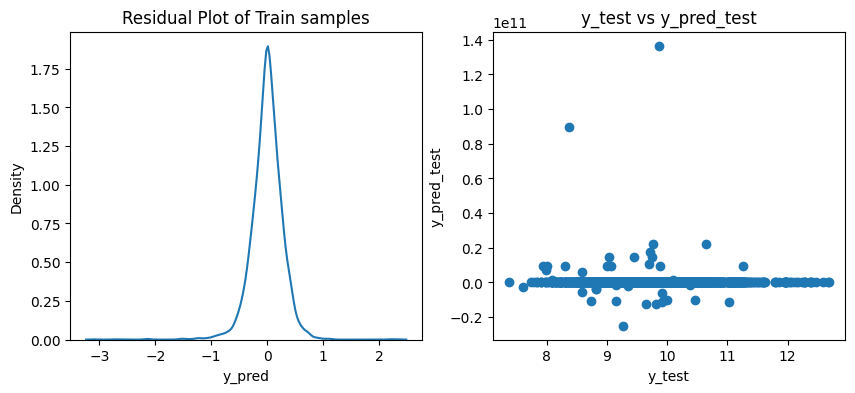

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
car_price_prediction_model(lm)

RFE

Training set R2 scores:  0.79
Test set R2 scores:  0.8
Training cross validation score:  [0.80297032 0.75473241 0.80087125 0.79031636 0.80490802]
Training cross validation mean score:  0.79


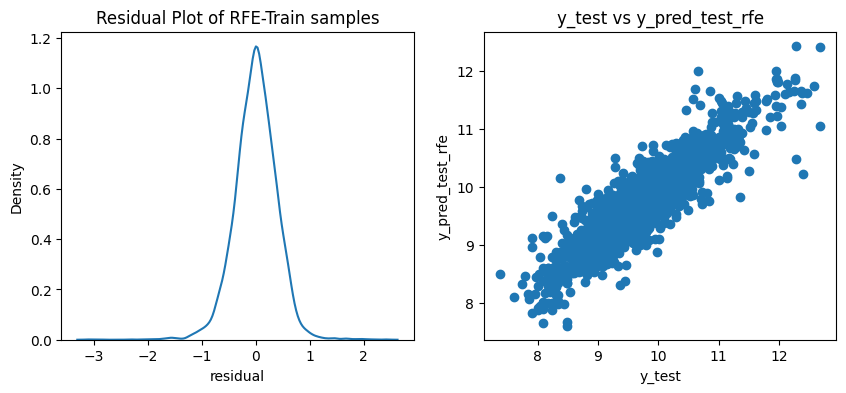

In [ ]:
car_price_prediction_model_rfe(lm)

Linear Regression(Ridge)

Training set R2 scores:  0.89
Test set R2 scores:  0.88
Training cross validation score:  [0.8700853  0.82678241 0.86177262 0.86694451 0.87952074]
Training cross validation mean score:  0.86


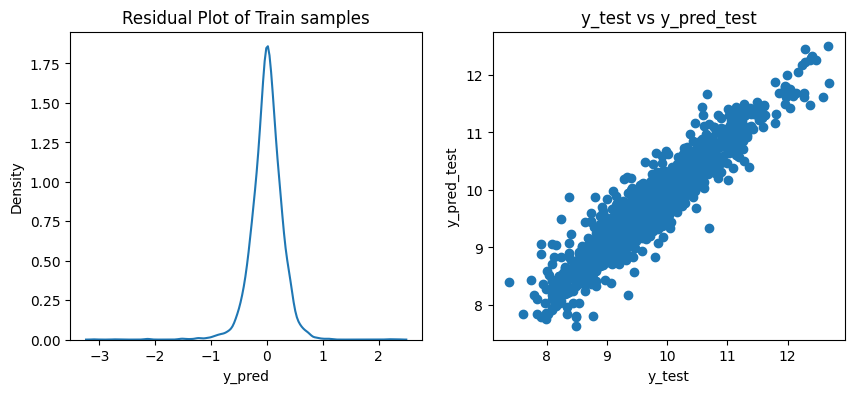

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))
car_price_prediction_model(rg_rs)

RFE

Training set R2 scores:  0.79
Test set R2 scores:  0.8
Training cross validation score:  [0.80293532 0.75464253 0.80084546 0.79041722 0.80497617]
Training cross validation mean score:  0.79


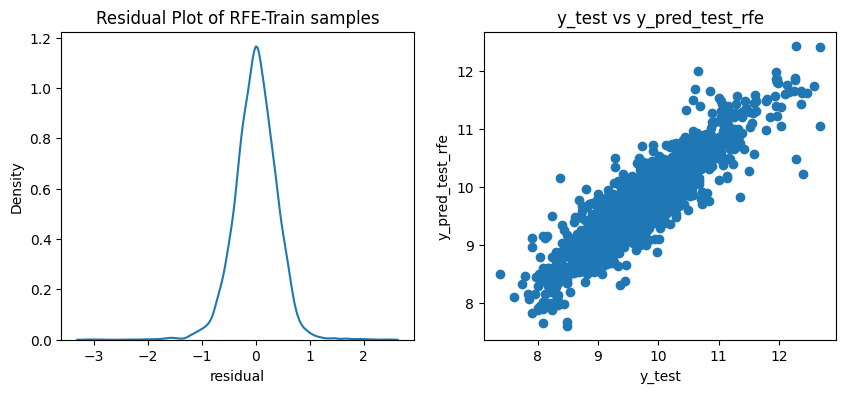

In [ ]:
car_price_prediction_model_rfe(rg_rs)

Linear Regression(Lasso)

Training set R2 scores:  0.79
Test set R2 scores:  0.8
Training cross validation score:  [0.82316053 0.75016508 0.79851752 0.794861   0.83177582]
Training cross validation mean score:  0.8


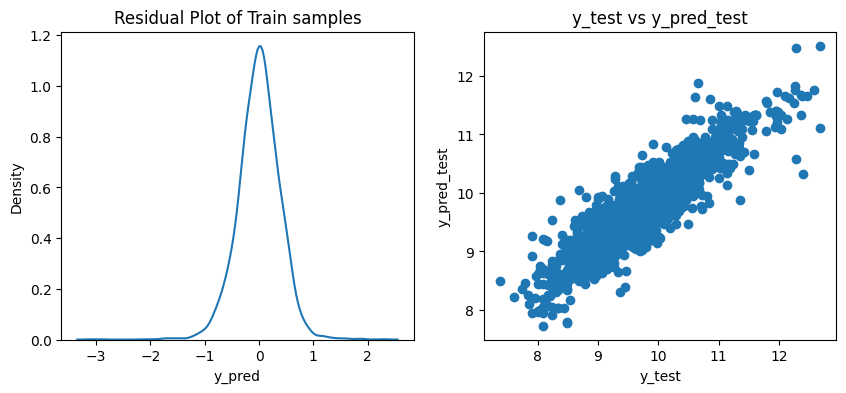

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14)
ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))
car_price_prediction_model(ls_rs)

RFE

Training set R2 scores:  0.79
Test set R2 scores:  0.8
Training cross validation score:  [0.80062799 0.75202751 0.79957821 0.79073784 0.80352598]
Training cross validation mean score:  0.79


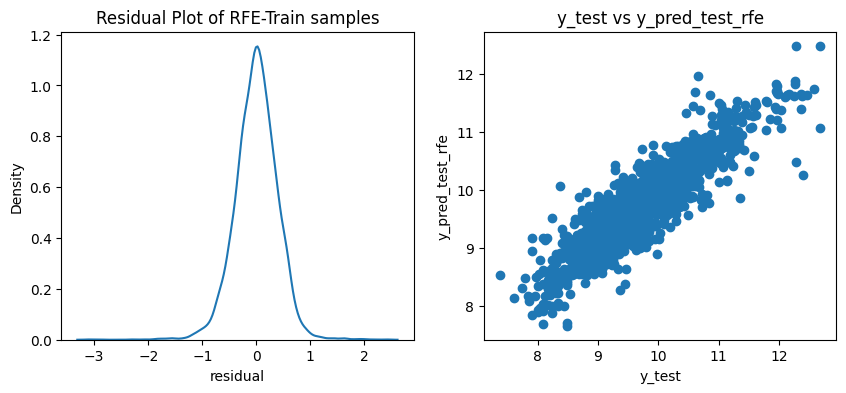

In [ ]:
car_price_prediction_model_rfe(ls_rs)

Extreme Gradient Boosting Regressor

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbosity= 0)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]


parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xg_rs = RandomizedSearchCV(estimator=xg, param_distributions=parameter_grid)

Training set R2 scores:  0.99
Test set R2 scores:  0.9
Training cross validation score:  [0.89033584 0.87594606 0.89818802 0.90073676 0.90248464]
Training cross validation mean score:  0.89


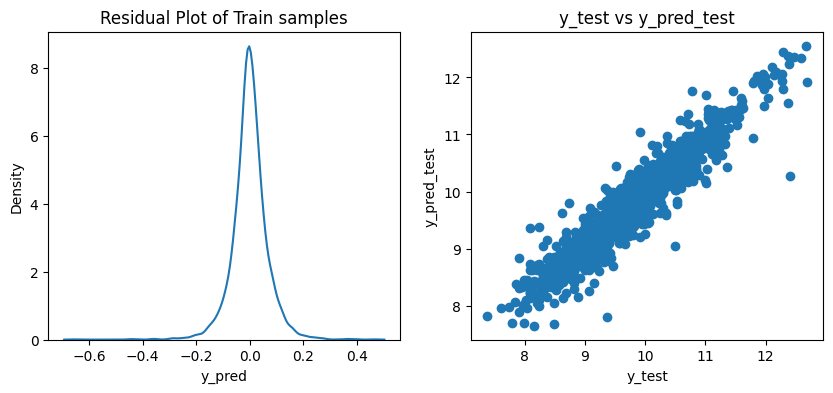

In [ ]:
car_price_prediction_model(xg_rs)

RFE

Training set R2 scores:  0.93
Test set R2 scores:  0.86
Training cross validation score:  [0.85578075 0.84198062 0.8748469  0.85744877 0.87395781]
Training cross validation mean score:  0.86


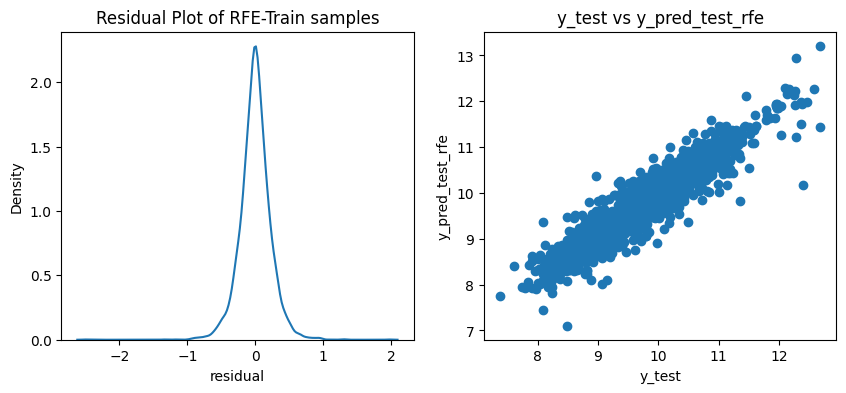

In [ ]:
car_price_prediction_model_rfe(xg_rs)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Training set R2 scores:  0.83
Test set R2 scores:  0.8
Training cross validation score:  [0.78800232 0.76254113 0.79415325 0.80795209 0.81348941]
Training cross validation mean score:  0.79


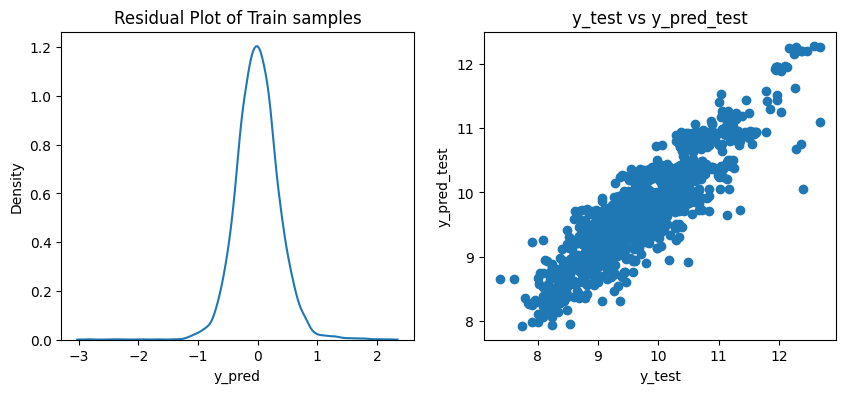

In [ ]:
car_price_prediction_model(rf_rs)

RFE

Training set R2 scores:  0.82
Test set R2 scores:  0.8
Training cross validation score:  [0.79248536 0.76017567 0.78890043 0.81058932 0.806494  ]
Training cross validation mean score:  0.79


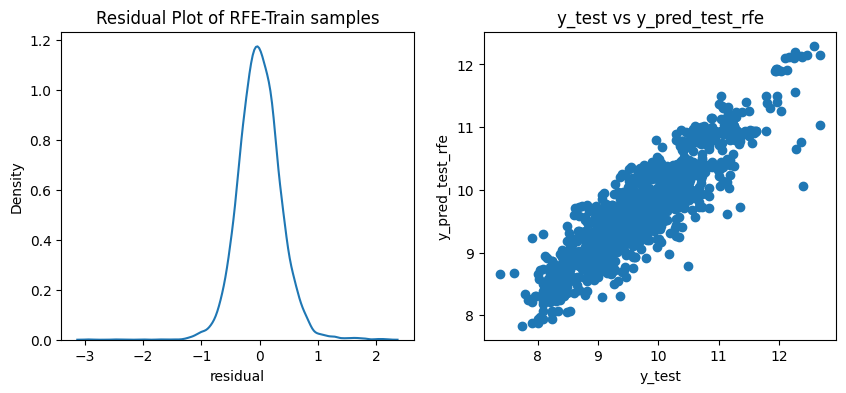

In [ ]:
car_price_prediction_model_rfe(rf_rs)

Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Training set R2 scores:  0.95
Test set R2 scores:  0.91
Training cross validation score:  [0.89208939 0.87612915 0.89964923 0.89673811 0.90639543]
Training cross validation mean score:  0.89


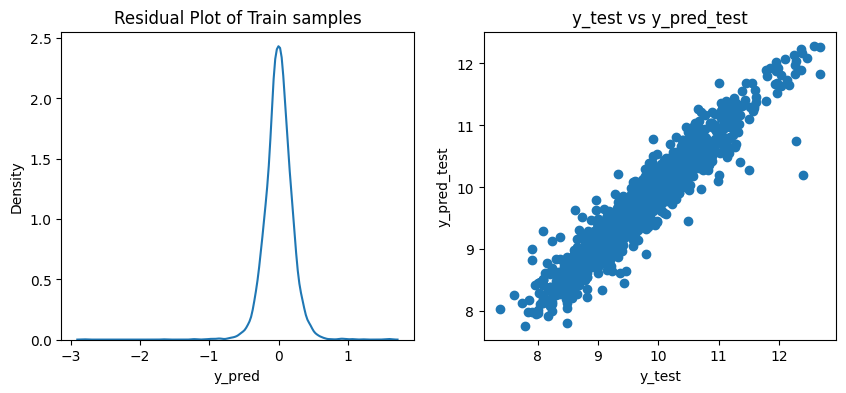

In [ ]:
car_price_prediction_model(gb_rs)

RFE

Training set R2 scores:  0.96
Test set R2 scores:  0.87
Training cross validation score:  [0.86560895 0.84410877 0.87528322 0.86359299 0.87261444]
Training cross validation mean score:  0.86


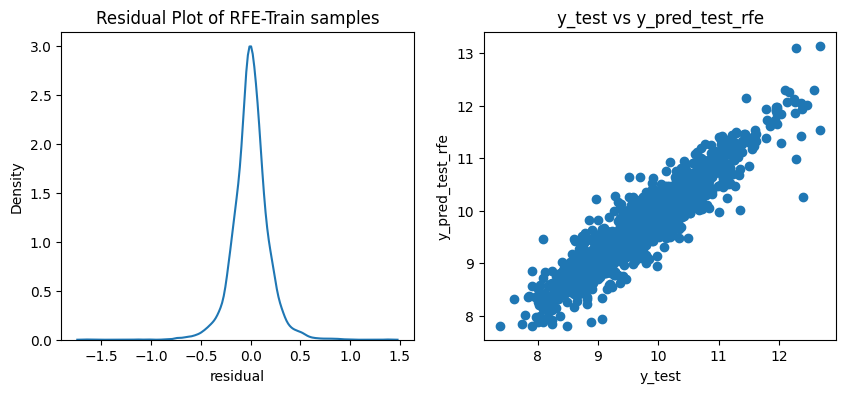

In [ ]:
car_price_prediction_model_rfe(gb_rs)

Model Evaluation and Conclusion

In [ ]:
algo = ["LinearRegression(OLS)","LinearRegression(Ridge)","LinearRegression(Lasso)",
        "ExtremeGradientBoostingRegressor","RandomForestRegressor","GradientBoostingRegressor"]

model_eval = pd.DataFrame({'Model': algo,'R Squared(Train)': r2_train_scores,'R Squared(Test)': r2_test_scores,
                           'CV score mean(Train)': cv_mean})
display(model_eval)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression(OLS),0.89,-3.035618e+19,-2.035557e+20
1,LinearRegression(Ridge),0.89,8.800000e-01,8.600000e-01
2,LinearRegression(Lasso),0.79,8.000000e-01,8.000000e-01
3,ExtremeGradientBoostingRegressor,0.99,9.000000e-01,8.900000e-01
4,RandomForestRegressor,0.83,8.000000e-01,7.900000e-01
5,GradientBoostingRegressor,0.95,9.100000e-01,8.900000e-01


In [ ]:
model_eval_RFE = pd.DataFrame({'Model': algo,'R Squared(Train)': r2_train_scores_rfe,
                                'R Squared(Test)': r2_test_scores_rfe,'CV score mean(Train)': cv_mean_rfe})
display(model_eval_RFE)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression(OLS),0.79,0.80,0.79
1,LinearRegression(Ridge),0.79,0.80,0.79
2,LinearRegression(Lasso),0.79,0.80,0.79
3,ExtremeGradientBoostingRegressor,0.93,0.86,0.86
4,RandomForestRegressor,0.82,0.80,0.79
5,GradientBoostingRegressor,0.96,0.87,0.86


Conclusion

Extreme Gradient Boosting Regressor is the model with highest CV score(0.89).

RFE could be used to save computational time, but in our case it didn't really help to improve the results.